# Unsupervised Learning - Atividade

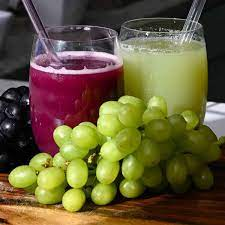

Joseph Samuel Neiva & Orlando Mota Pires

# 1. Objetivo

### Criar um algoritmo não-supervisionado para separar os diferentes tipos de vinho

# 2. Dataset

### Criar um algoritmo não-supervisionado para separar os diferentes tipos de vinho

### 2a: O dataset

- Alcohol (Álcool): Quantidade de álcool presente no vinho.
- Malic acid (Ácido málico): Um ácido orgânico encontrado em muitas frutas e vegetais, contribui para o sabor azedo do vinho.
- Ash (Cinza): Uma medida da quantidade total de minerais presentes no vinho.
- Alcalinity of ash (Alcalinidade da cinza): Mede o quão alcalina é a cinza quando o vinho é queimado (uma maneira de avaliar os minerais).
- Magnesium (Magnésio): Quantidade deste elemento mineral no vinho.
- Total phenols (Fenóis totais): Medida dos compostos fenólicos presentes, que influenciam o sabor e a cor do vinho.
- Flavanoids (Flavonoides): Um tipo específico de fenol que tem propriedades antioxidantes.
- Non-flavanoid phenols (Fenóis não flavonoides): Fenóis que não são flavonoides.
- Proanthocyanins (Proantocianidinas): Um tipo de flavonoide.
- Color intensity (Intensidade de cor): Uma medida da cor do vinho.
- Hue (Matiz): Também relacionado à cor, descreve o tipo de vermelho do vinho (por exemplo, um matiz roxo ou laranja).
- OD280/OD315 of diluted wines (OD280/OD315 de vinhos diluídos): Uma medida da densidade óptica que ajuda a determinar a concentração de proteínas no vinho.
- Proline: Um aminoácido que pode afetar o sabor e a cor do vinho.

### 2b: Download

In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 2c: Interação com pandas

In [2]:
# https://archive.ics.uci.edu/dataset/109/wine
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

In [3]:
# Features
wine.data.features


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
X.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

### 2d: Target (sem label)

In [5]:
# Target
y['class'].unique()

array([1, 2, 3])

# 3. Algoritmo

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [7]:
# Supondo que os dados já foram carregados como X
# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


/home/neiva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/neiva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/neiva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/neiva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/neiva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/neiva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/neiva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

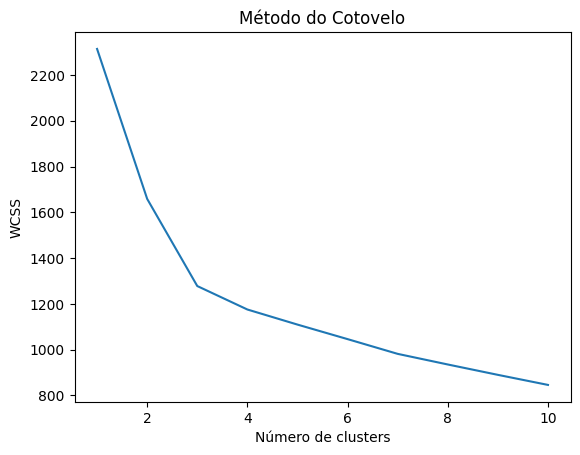

In [8]:
wcss = []  # Lista para armazenar a soma dos quadrados das distâncias intra-cluster
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X_normalized)
    wcss.append(kmeans.inertia_)

# Gráfico do método do cotovelo
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

# Suponha que o número ótimo de clusters seja 3 com base no gráfico
n_clusters = 3


In [9]:
kmeans = KMeans(n_clusters=n_clusters, random_state=91).fit(X_normalized)


/home/neiva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


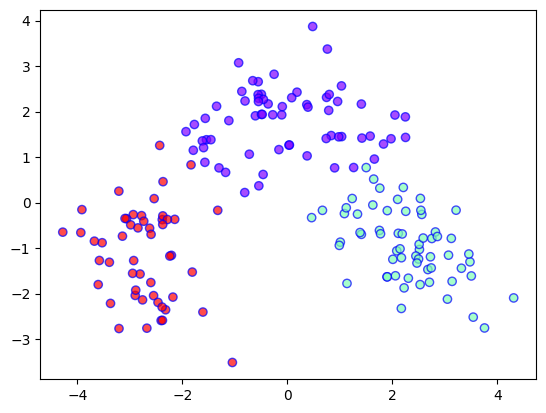

In [10]:
# Adicionar rótulos de cluster aos dados originais
X_clustered = X.copy()
X_clustered['Cluster'] = kmeans.labels_

# Visualizar os clusters em um espaço de características reduzido usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.show()


In [11]:
df = wine.data.features

/home/neiva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 2 2 2 1 2
 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2]


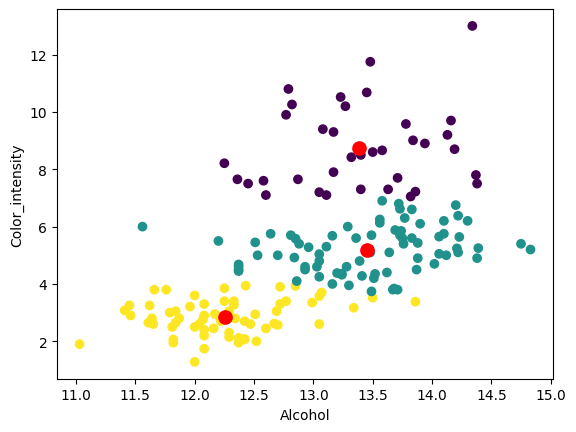

In [12]:
columns = ['Alcohol', 'Color_intensity', 'Hue', 'Ash']
dfX = df[columns]  # Select only petal length and width

# # Use K-means clustering to group the samples into 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(dfX)

# # Print the predicted cluster assignments for the first 100 samples
print(kmeans.predict(dfX[:100]))

# # Plot the clusters and centroids
# import matplotlib.pyplot as plt

plt.scatter(dfX[columns[0]], dfX[columns[1]], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=91, c='red')
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

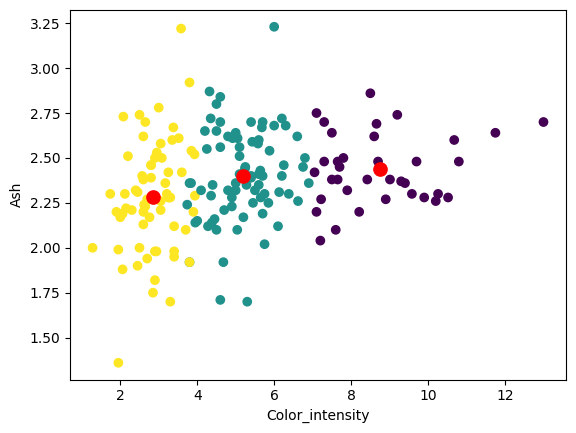

In [13]:

plt.scatter(dfX[columns[1]], dfX[columns[3]], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], marker='o', s=91, c='red')
plt.xlabel(columns[1])
plt.ylabel(columns[3])
plt.show()

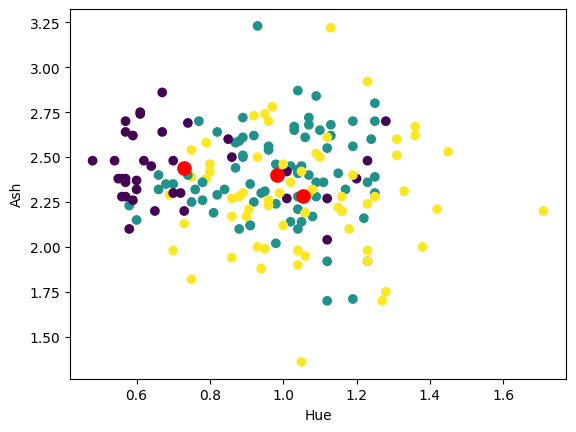

In [14]:

plt.scatter(dfX[columns[2]], dfX[columns[3]], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], marker='o', s=91, c='red')
plt.xlabel(columns[2])
plt.ylabel(columns[3])
plt.show()

/home/neiva/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


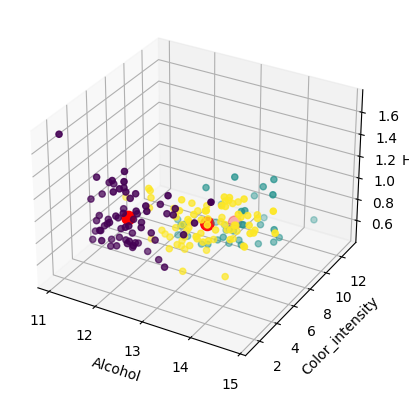

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import KMeans

# Suppose df is your DataFrame
columns = ['Alcohol', 'Color_intensity', 'Hue']
dfX = df[columns]

# Use K-means to cluster the samples into 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(dfX)

# Create a figure
fig = plt.figure()

# Add a 3D plot to the figure
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(dfX['Alcohol'], dfX['Color_intensity'], dfX['Hue'], c=kmeans.labels_, cmap='viridis', s=20)

# Plot the cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           marker='o', s=91, c='red', label='Centroids')

# Add labels to the axes
ax.set_xlabel('Alcohol')
ax.set_ylabel('Color_intensity')
ax.set_zlabel('Hue')

# Show the plot
plt.show()


In [17]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine = pd.read_csv(url, names=column_names)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_n = wine.drop("Class", axis=1)
y_n = wine["Class"]

X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.2, random_state=91)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

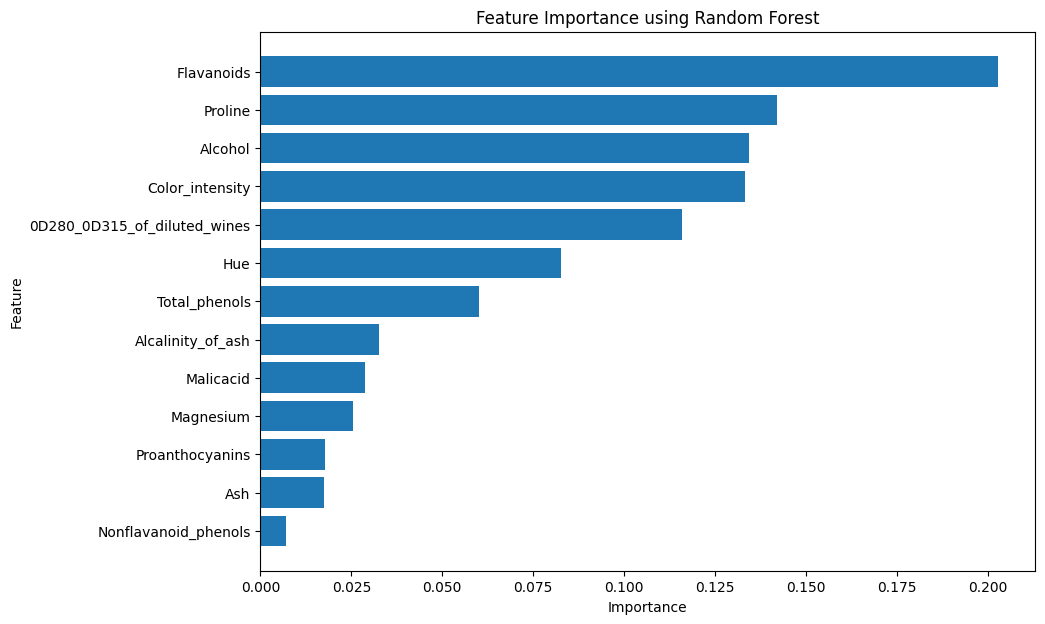

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_imp = clf.feature_importances_
sorted_idx = feature_imp.argsort()

plt.figure(figsize=(10,7))
plt.barh(X.columns[sorted_idx], feature_imp[sorted_idx])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance using Random Forest")
plt.show()


In [ ]:
# Seu algoritmo não supervisionado
# Ver aulas anteriores para alguns exemplos
# Critérios para avaliação
# - Inovação
# - Resultados
# - Análise de dataset
# - Utilizou técnica não-supervisionada